# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **economic activity or measures** (see below) for the region of **Ann Arbor, Michigan, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Ann Arbor, Michigan, United States** to Ann Arbor, USA. In that case at least one source file must be about **Ann Arbor, Michigan, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Ann Arbor, Michigan, United States** and **economic activity or measures**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **economic activity or measures**?  For this category you might look at the inputs or outputs to the given economy, or major changes in the economy compared to other regions.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
%matplotlib notebook

## Data URL

[Subway](https://data.seoul.go.kr/dataList/OA-12914/S/1/datasetView.do#)

[Local](https://data.seoul.go.kr/dataList/OA-14979/F/1/datasetView.do#)

[Seoul Corona State](https://data.seoul.go.kr/dataList/OA-20279/S/1/datasetView.do)

[Population For each gu](https://data.seoul.go.kr/dataList/419/S/2/datasetView.do)

## Get Corona Virus Patient Data by rest API

Only 1000 people per request

In [3]:
import requests
base_url = 'http://openapi.seoul.go.kr:8088/'
params = {'KEY':'64585342426e65743534494f4a5058','TYPE':'xml','SERVICE':'Corona19Status',
          'START_INDEX':1001,'END_INDEX':2000}
url = base_url
for param in params.values():
    url += str(param) + '/'
url

'http://openapi.seoul.go.kr:8088/64585342426e65743534494f4a5058/xml/Corona19Status/1001/2000/'

In [4]:
r = requests.get(url)
r.text

'<?xml version="1.0" encoding="UTF-8"?>\n<Corona19Status>\n<list_total_count>121843</list_total_count>\n<RESULT>\n<CODE>INFO-000</CODE>\n<MESSAGE>정상 처리되었습니다</MESSAGE>\n</RESULT>\n<row>\n<CORONA19_ID>120843</CORONA19_ID>\n<CORONA19_DATE>2021-11-02</CORONA19_DATE>\n<CORONA19_NO/>\n<CORONA19_COUNTRY/>\n<CORONA19_PERSONAL/>\n<CORONA19_AREA>중랑구</CORONA19_AREA>\n<CORONA19_TRAVEL_HISTORY/>\n<CORONA19_CONTACT_HISTORY>감염경로 조사중</CORONA19_CONTACT_HISTORY>\n<CORONA19_CORRECTIVE/>\n<CORONA19_LEAVE_STATUS>-</CORONA19_LEAVE_STATUS>\n<CORONA19_MOVING_PATH/>\n<CORONA19_IDATE>2021-11-03 10:07:36</CORONA19_IDATE>\n</row>\n<row>\n<CORONA19_ID>120842</CORONA19_ID>\n<CORONA19_DATE>2021-11-02</CORONA19_DATE>\n<CORONA19_NO/>\n<CORONA19_COUNTRY/>\n<CORONA19_PERSONAL/>\n<CORONA19_AREA>타시도</CORONA19_AREA>\n<CORONA19_TRAVEL_HISTORY/>\n<CORONA19_CONTACT_HISTORY>감염경로 조사중</CORONA19_CONTACT_HISTORY>\n<CORONA19_CORRECTIVE/>\n<CORONA19_LEAVE_STATUS>-</CORONA19_LEAVE_STATUS>\n<CORONA19_MOVING_PATH/>\n<CORONA19_IDATE>202

In [5]:
import json


## Get Corona Virus Patient Data by File

21/10/25

https://data.seoul.go.kr/dataList/OA-20279/S/1/datasetView.do

https://www.data.go.kr/data/15063273/fileData.do

In [6]:
import os

os.listdir()

['.ipynb_checkpoints',
 'Assignment4.ipynb',
 'data',
 'iris.csv',
 'local.csv',
 'local_name.csv',
 'mywork4.ipynb']

In [7]:
import re
gu_kr_en = {}
gu_str = '''종로구 영어표기는 Jongno-gu
중구 영어표기는 Jung-gu
용산구 영어표기는 Yongsan-gu
성동구 영어표기는 Seongdong-gu
광진구 영어표기는 Gwangjin-gu
동대문구 영어표기는 Dongdaemun-gu
중랑구 영어표기는 Jungnang-gu
성북구 영어표기는 Seongbuk-gu
강북구 영어표기는 Gangbuk-gu
도봉구 영어표기는 Dobong-gu
노원구 영어표기는 Nowon-gu
은평구 영어표기는 Eunpyeong-gu
서대문구 영어표기는 Seodaemun-gu
마포구 영어표기는 Mapo-gu
양천구 영어표기는 Yangcheon-gu
강서구 영어표기는 Gangseo-gu
구로구 영어표기는 Guro-gu
금천구 영어표기는 Geumcheon-gu
영등포구 영어표기는 Yeongdeungpo-gu
동작구 영어표기는 Dongjak-gu
관악구 영어표기는 Gwanak-gu
서초구 영어표기는 Seocho-gu
강남구 영어표기는 Gangnam-gu
송파구 영어표기는 Songpa-gu
강동구 영어표기는 Gangdong-gu'''
for item in re.finditer('(?P<kr>.*구).* (?P<en>[a-zA-Z]*-gu)',gu_str):
    result = item.groupdict()
    gu_kr_en[result['kr']] = result['en']
gu_kr_en

{'종로구': 'Jongno-gu',
 '중구': 'Jung-gu',
 '용산구': 'Yongsan-gu',
 '성동구': 'Seongdong-gu',
 '광진구': 'Gwangjin-gu',
 '동대문구': 'Dongdaemun-gu',
 '중랑구': 'Jungnang-gu',
 '성북구': 'Seongbuk-gu',
 '강북구': 'Gangbuk-gu',
 '도봉구': 'Dobong-gu',
 '노원구': 'Nowon-gu',
 '은평구': 'Eunpyeong-gu',
 '서대문구': 'Seodaemun-gu',
 '마포구': 'Mapo-gu',
 '양천구': 'Yangcheon-gu',
 '강서구': 'Gangseo-gu',
 '구로구': 'Guro-gu',
 '금천구': 'Geumcheon-gu',
 '영등포구': 'Yeongdeungpo-gu',
 '동작구': 'Dongjak-gu',
 '관악구': 'Gwanak-gu',
 '서초구': 'Seocho-gu',
 '강남구': 'Gangnam-gu',
 '송파구': 'Songpa-gu',
 '강동구': 'Gangdong-gu'}

In [8]:
#corona
patient = pd.read_csv('./data/corona/Corona_Patient_Seoul.csv', engine='python',encoding='utf-8')
new_column=['serial_number','confirmed_date','patient_number','nation','patient_info',
           'region','travel_history','contact_history','state','moving_route',
           'reg_date','update_date','is_expose']
patient = patient.rename(columns=dict(zip(patient.columns,new_column)))
patient = patient[(patient['region']!='타시도') & (patient['region']!='기타')] #You don't have to care about them. They mean from another city and e.t.c.
# Seoul the capital of Korea has hierarchical address system.
# EX) America : State - City - Name of Street - Number
# Seoul : Seoul - Gu - Name of Street - Number
# I will use second hierarchy Gu.

def change_kr_to_en(item):
    item['region'] = gu_kr_en[item['region']]
    return item

patient = patient.apply(change_kr_to_en,axis=1)
patient = patient[patient['confirmed_date']>='2021-07-01']
patient = patient[patient['confirmed_date']<'2021-10-01']
patient

,serial_number,confirmed_date,patient_number,nation,patient_info,region,travel_history,contact_history,state,moving_route,reg_date,update_date,is_expose,노출여부
14017,101400,2021-09-30,NaN,NaN,NaN,Seongbuk-gu,NaN,감염경로 조사중,NaN,퇴원,NaN,2021-10-25 11:23,2021-10-25 11:23,Y
14018,101399,2021-09-30,NaN,NaN,NaN,Seongbuk-gu,NaN,감염경로 조사중,NaN,-,NaN,2021-10-25 11:23,2021-10-25 11:23,Y
14021,101396,2021-09-30,NaN,NaN,NaN,Gangbuk-gu,NaN,감염경로 조사중,NaN,-,NaN,2021-10-25 11:23,2021-10-25 11:23,Y
14022,101395,2021-09-30,NaN,NaN,NaN,Songpa-gu,NaN,기타 확진자 접촉,NaN,-,NaN,2021-10-25 11:23,2021-10-25 11:23,Y
14023,101394,2021-09-30,NaN,NaN,NaN,Dongjak-gu,NaN,감염경로 조사중,NaN,-,NaN,2021-10-25 11:23,2021-10-25 11:23,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65093,50324,2021-07-01,NaN,NaN,NaN,Seongbuk-gu,NaN,성동구 소재 노래연습장 관련,NaN,퇴원,NaN,2021-10-14 10:04,2021-10-14 10:04,Y
65094,50323,2021-07-01,NaN,NaN,NaN,Dongjak-gu,NaN,기타 확진자 접촉,NaN,퇴원,NaN,2021-10-14 10:04,2021-10-14 10:04,Y
65095,50322,2021-07-01,NaN,NaN,NaN,Dongjak-gu,시에라리온,해외유입,NaN,퇴원,NaN,2021-10-14 10:04,2021-10-14 10:04,Y
65096,50321,2021-07-01,NaN,NaN,NaN,Dongjak-gu,NaN,감염경로 조사중,NaN,퇴원,NaN,2021-10-14 10:04,2021-10-14 10:04,Y


In [9]:
group_by_region = patient.groupby('region').count()
group_by_region

,serial_number,confirmed_date,patient_number,nation,patient_info,travel_history,contact_history,state,moving_route,reg_date,update_date,is_expose,노출여부
region,,,,,,,,,,,,,
Dobong-gu,1147,1147,0,0,0,11,1147,0,1147,0,1147,1147,1147
Dongdaemun-gu,1770,1770,0,0,0,14,1770,0,1770,0,1770,1770,1770
Dongjak-gu,2124,2124,0,0,0,21,2124,0,2124,0,2124,2124,2124
Eunpyeong-gu,2203,2203,0,0,0,15,2203,0,2203,0,2203,2203,2203
Gangbuk-gu,1249,1249,0,0,0,2,1249,0,1249,0,1249,1249,1249
Gangdong-gu,1863,1863,0,0,0,7,1863,0,1863,0,1863,1863,1863
Gangnam-gu,3760,3760,0,0,0,51,3760,0,3760,0,3760,3760,3760
Gangseo-gu,2125,2125,0,0,0,26,2125,0,2125,0,2125,2125,2125
Geumcheon-gu,1306,1306,0,0,0,4,1306,0,1306,0,1306,1306,1306


<IPython.core.display.Javascript object>


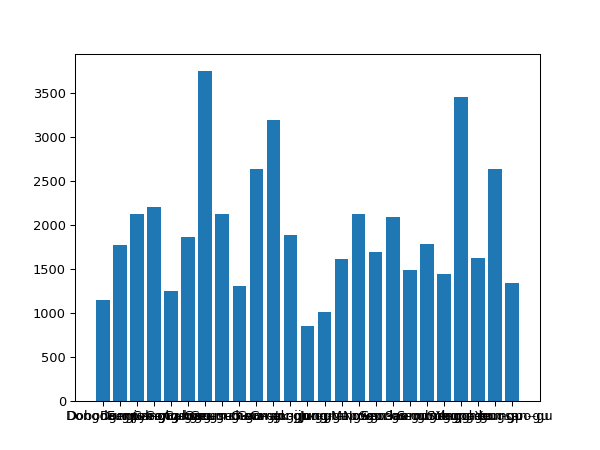

<BarContainer object of 25 artists>

In [27]:
plt.figure()
plt.bar(group_by_region.index,group_by_region['serial_number'])

In [11]:
group_by_date = patient.groupby('confirmed_date').count()

<IPython.core.display.Javascript object>


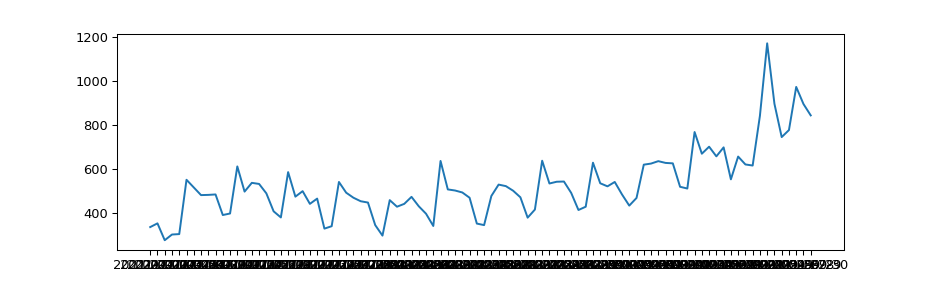

In [28]:
plt.figure(figsize=(10,3))
plt.plot(group_by_date.index,group_by_date['serial_number'])

In [13]:
#administration code
admin_code = pd.read_csv('./data/code/administration_code_20211026.csv', engine='python',encoding='utf-8')
new_column = {'행정동코드':'administration_code','시도명':'city','시군구명':'gu','읍면동명':'dong',
              '생성일자':'creation_date','말소일자':'deletion_date'}
admin_code = admin_code.rename(columns=new_column)
admin_code = admin_code[admin_code['city']=='서울특별시']
admin_code = admin_code.loc[:,['administration_code','gu','dong']]
admin_code = admin_code.astype({'administration_code':str})
admin_code = admin_code.set_index('administration_code')
def change_kr_to_en(item):
    if not pd.isnull(item['gu']):
        item['gu'] = gu_kr_en[item['gu']]
    return item

admin_code = admin_code.apply(change_kr_to_en,axis=1)
admin_code

,gu,dong
administration_code,,
1100000000,NaN,NaN
1111000000,Jongno-gu,NaN
1111051500,Jongno-gu,청운효자동
1111053000,Jongno-gu,사직동
1111054000,Jongno-gu,삼청동
...,...,...
1130560600,Gangbuk-gu,번제3동
1130561000,Gangbuk-gu,수유제1동
1130562000,Gangbuk-gu,수유제2동


In [14]:
admin_code.dtypes

gu      object
dong    object
dtype: object

I will use only 3 month data for visualization because local people data is too big for my poor computer :). Of course, larger data will be more interesting and meaningful.

In [15]:
population = pd.read_csv('./data/population/population.csv')
new_value = ['gu','household','sum','man','woman','local_sum','local_man','local_woman',
            'foreign_sum','foreign_man','foreign_woman','people_per_household','aged_65']
new_column = dict(zip(population.columns,new_value))
population = population.rename(columns=new_column)
def change_kr_to_en(item):
    if not pd.isnull(item['gu']):
        item['gu'] = gu_kr_en[item['gu']]
    return item

population = population.apply(change_kr_to_en,axis=1)

In [16]:
population.dtypes

gu                       object
household                 int64
sum                       int64
man                       int64
woman                     int64
local_sum                 int64
local_man                 int64
local_woman               int64
foreign_sum               int64
foreign_man               int64
foreign_woman             int64
people_per_household    float64
aged_65                   int64
dtype: object

In [17]:
os.listdir('./data/local')

['local.csv',
 'local_name.csv',
 'LOCAL_PEOPLE_20210701.csv',
 'LOCAL_PEOPLE_20210702.csv',
 'LOCAL_PEOPLE_20210703.csv',
 'LOCAL_PEOPLE_20210704.csv',
 'LOCAL_PEOPLE_20210705.csv',
 'LOCAL_PEOPLE_20210706.csv',
 'LOCAL_PEOPLE_20210707.csv',
 'LOCAL_PEOPLE_20210708.csv',
 'LOCAL_PEOPLE_20210709.csv',
 'LOCAL_PEOPLE_20210710.csv',
 'LOCAL_PEOPLE_20210711.csv',
 'LOCAL_PEOPLE_20210712.csv',
 'LOCAL_PEOPLE_20210713.csv',
 'LOCAL_PEOPLE_20210714.csv',
 'LOCAL_PEOPLE_20210715.csv',
 'LOCAL_PEOPLE_20210716.csv',
 'LOCAL_PEOPLE_20210717.csv',
 'LOCAL_PEOPLE_20210718.csv',
 'LOCAL_PEOPLE_20210719.csv',
 'LOCAL_PEOPLE_20210720.csv',
 'LOCAL_PEOPLE_20210721.csv',
 'LOCAL_PEOPLE_20210722.csv',
 'LOCAL_PEOPLE_20210723.csv',
 'LOCAL_PEOPLE_20210724.csv',
 'LOCAL_PEOPLE_20210725.csv',
 'LOCAL_PEOPLE_20210726.csv',
 'LOCAL_PEOPLE_20210727.csv',
 'LOCAL_PEOPLE_20210728.csv',
 'LOCAL_PEOPLE_20210729.csv',
 'LOCAL_PEOPLE_20210730.csv',
 'LOCAL_PEOPLE_20210731.csv',
 'LOCAL_PEOPLE_20210801.csv',
 'LOCAL

In [18]:
interval = np.arange(10,70,5)
man_interval = []
woman_interval = []
for left in interval:
    man_interval.append('man_{}_{}'.format(left,left+4))
    woman_interval.append('woman_{}_{}'.format(left,left+4))
man_interval

['man_10_14',
 'man_15_19',
 'man_20_24',
 'man_25_29',
 'man_30_34',
 'man_35_39',
 'man_40_44',
 'man_45_49',
 'man_50_54',
 'man_55_59',
 'man_60_64',
 'man_65_69']

In [19]:
#There was a problem that pandas can't recognize columns in Korean.
#I solved it by saving the csv file by UTF-8 encoding,
#However, there are too many files for local people, so I changed columns in direct.
new_column = ['date','hour','administration_code','census_output_area_code',
              'living_population','man_0_9']+man_interval+['man_70_','woman_0_9']+woman_interval+['woman_70_']
#de facto population means number of people in specific area.
df = pd.read_csv('./data/local/LOCAL_PEOPLE_20210720.csv',skiprows=1,names=new_column)
df['date']=pd.to_datetime(df['date'],format='%Y%m%d')
df = df.astype({'administration_code':str})
df['administration_code'] += '00' #Administration code is 10 digits

#I cbange hour to daytime/night/dawn
#datetime is 8:00 A.M. ~ 6:00 P.M.
#night is 6:00 P.M ~ 12:00 A.M.
daytime_mask = (df['hour'] >= 8) & (df['hour'] <= 18) #It's better than 'apply func' in terms of speed
night_mask = (df['hour'] >= 18) & (df['hour'] <= 24)
dawn_mask = ~(daytime_mask | night_mask)
df.loc[daytime_mask,'hour'] = 'daytime'
df.loc[night_mask,'hour'] = 'night'
df.loc[dawn_mask,'hour'] = 'dawn'

In [20]:
df2 = df.groupby(['date','administration_code','hour']).mean('living_population')
df2

census_output_area_code  \
date       administration_code hour                               
2021-07-20 1111051500          dawn                1.101072e+12   
                               daytime             1.101072e+12   
                               night               1.101072e+12   
           1111053000          dawn                1.101053e+12   
                               daytime             1.101053e+12   
...                                                         ...   
           1174069000          daytime             1.125070e+12   
                               night               1.125070e+12   
           1174070000          dawn                1.125071e+12   
                               daytime             1.125071e+12   
                               night               1.125071e+12   

                                        living_population  
date       administration_code hour                        
2021-07-20 1111051500          dawn            569.660364  
                               daytime         635.864168  
                               night           561.781240  
           1111053000          dawn            999.125903  
                               daytime        2363.006262  
...                                                   ...  
           1174069000          daytime         153.175259  
                               night           164.090537  
           1174070000          dawn            511.671367  
                               daytime         511.465755  
                               night           504.229407  

[1272 rows x 2 columns]

In [21]:
os.listdir('./data/local')

['local.csv',
 'local_name.csv',
 'LOCAL_PEOPLE_20210701.csv',
 'LOCAL_PEOPLE_20210702.csv',
 'LOCAL_PEOPLE_20210703.csv',
 'LOCAL_PEOPLE_20210704.csv',
 'LOCAL_PEOPLE_20210705.csv',
 'LOCAL_PEOPLE_20210706.csv',
 'LOCAL_PEOPLE_20210707.csv',
 'LOCAL_PEOPLE_20210708.csv',
 'LOCAL_PEOPLE_20210709.csv',
 'LOCAL_PEOPLE_20210710.csv',
 'LOCAL_PEOPLE_20210711.csv',
 'LOCAL_PEOPLE_20210712.csv',
 'LOCAL_PEOPLE_20210713.csv',
 'LOCAL_PEOPLE_20210714.csv',
 'LOCAL_PEOPLE_20210715.csv',
 'LOCAL_PEOPLE_20210716.csv',
 'LOCAL_PEOPLE_20210717.csv',
 'LOCAL_PEOPLE_20210718.csv',
 'LOCAL_PEOPLE_20210719.csv',
 'LOCAL_PEOPLE_20210720.csv',
 'LOCAL_PEOPLE_20210721.csv',
 'LOCAL_PEOPLE_20210722.csv',
 'LOCAL_PEOPLE_20210723.csv',
 'LOCAL_PEOPLE_20210724.csv',
 'LOCAL_PEOPLE_20210725.csv',
 'LOCAL_PEOPLE_20210726.csv',
 'LOCAL_PEOPLE_20210727.csv',
 'LOCAL_PEOPLE_20210728.csv',
 'LOCAL_PEOPLE_20210729.csv',
 'LOCAL_PEOPLE_20210730.csv',
 'LOCAL_PEOPLE_20210731.csv',
 'LOCAL_PEOPLE_20210801.csv',
 'LOCAL

In [22]:
'LOCAL_PEOPLE_20210701.csv'[17:21]

'0701'

In [23]:
new_column = ['date','hour','administration_code','census_output_area_code',
              'living_population','man_0_9']+man_interval+['man_70_','woman_0_9']+woman_interval+['woman_70_']
#de facto population means number of people in specific area.
df = pd.read_csv('./data/local/LOCAL_PEOPLE_20210720.csv',skiprows=1,names=new_column)
df['date']=pd.to_datetime(df['date'],format='%Y%m%d')
df = df.astype({'administration_code':str})
df['administration_code'] += '00' #Administration code is 10 digits

#I cbange hour to daytime/night/dawn
#datetime is 8:00 A.M. ~ 6:00 P.M.
#night is 6:00 P.M ~ 12:00 A.M.
daytime_mask = (df['hour'] >= 8) & (df['hour'] <= 18) #It's better than 'apply func' in terms of speed
night_mask = (df['hour'] >= 18) & (df['hour'] <= 24)
dawn_mask = ~(daytime_mask | night_mask)
df.loc[daytime_mask,'hour'] = 'daytime'
df.loc[night_mask,'hour'] = 'night'
df.loc[dawn_mask,'hour'] = 'dawn'
df2 = df.groupby(['administration_code','hour']).mean('living_population')

In [24]:
'''
local = pd.DataFrame(index=df2.index)
new_column = ['date','hour','administration_code','census_output_area_code',
              'living_population','man_0_9']+man_interval+['man_70_','woman_0_9']+woman_interval+['woman_70_']
for file in os.listdir('./data/local'):
    df = pd.read_csv('./data/local/{}'.format(file),skiprows=1,names=new_column)
    df['date']=pd.to_datetime(df['date'],format='%Y%m%d')
    df = df.astype({'administration_code':str})
    df['administration_code'] += '00'
    daytime_mask = (df['hour'] >= 8) & (df['hour'] <= 18)
    night_mask = (df['hour'] >= 18) & (df['hour'] <= 24)
    dawn_mask = ~(daytime_mask | night_mask)
    df.loc[daytime_mask,'hour'] = 'daytime'
    df.loc[night_mask,'hour'] = 'night'
    df.loc[dawn_mask,'hour'] = 'dawn'
    df2 = df.groupby(['administration_code','hour']).mean('living_population')
    local['population{}'.format(file[17:21])] = list(df2['living_population'])
'''

"\nlocal = pd.DataFrame(index=df2.index)\nnew_column = ['date','hour','administration_code','census_output_area_code',\n              'living_population','man_0_9']+man_interval+['man_70_','woman_0_9']+woman_interval+['woman_70_']\nfor file in os.listdir('./data/local'):\n    df = pd.read_csv('./data/local/{}'.format(file),skiprows=1,names=new_column)\n    df['date']=pd.to_datetime(df['date'],format='%Y%m%d')\n    df = df.astype({'administration_code':str})\n    df['administration_code'] += '00'\n    daytime_mask = (df['hour'] >= 8) & (df['hour'] <= 18)\n    night_mask = (df['hour'] >= 18) & (df['hour'] <= 24)\n    dawn_mask = ~(daytime_mask | night_mask)\n    df.loc[daytime_mask,'hour'] = 'daytime'\n    df.loc[night_mask,'hour'] = 'night'\n    df.loc[dawn_mask,'hour'] = 'dawn'\n    df2 = df.groupby(['administration_code','hour']).mean('living_population')\n    local['population{}'.format(file[17:21])] = list(df2['living_population'])\n"

In [25]:
for file in os.listdir('./data/local'):
    print(file)

local.csv
local_name.csv
LOCAL_PEOPLE_20210701.csv
LOCAL_PEOPLE_20210702.csv
LOCAL_PEOPLE_20210703.csv
LOCAL_PEOPLE_20210704.csv
LOCAL_PEOPLE_20210705.csv
LOCAL_PEOPLE_20210706.csv
LOCAL_PEOPLE_20210707.csv
LOCAL_PEOPLE_20210708.csv
LOCAL_PEOPLE_20210709.csv
LOCAL_PEOPLE_20210710.csv
LOCAL_PEOPLE_20210711.csv
LOCAL_PEOPLE_20210712.csv
LOCAL_PEOPLE_20210713.csv
LOCAL_PEOPLE_20210714.csv
LOCAL_PEOPLE_20210715.csv
LOCAL_PEOPLE_20210716.csv
LOCAL_PEOPLE_20210717.csv
LOCAL_PEOPLE_20210718.csv
LOCAL_PEOPLE_20210719.csv
LOCAL_PEOPLE_20210720.csv
LOCAL_PEOPLE_20210721.csv
LOCAL_PEOPLE_20210722.csv
LOCAL_PEOPLE_20210723.csv
LOCAL_PEOPLE_20210724.csv
LOCAL_PEOPLE_20210725.csv
LOCAL_PEOPLE_20210726.csv
LOCAL_PEOPLE_20210727.csv
LOCAL_PEOPLE_20210728.csv
LOCAL_PEOPLE_20210729.csv
LOCAL_PEOPLE_20210730.csv
LOCAL_PEOPLE_20210731.csv
LOCAL_PEOPLE_20210801.csv
LOCAL_PEOPLE_20210802.csv
LOCAL_PEOPLE_20210803.csv
LOCAL_PEOPLE_20210804.csv
LOCAL_PEOPLE_20210805.csv
LOCAL_PEOPLE_20210806.csv
LOCAL_PEOPLE_

In [26]:
#local.to_csv('local.csv')
#local['mean'] = local.mean(axis=1)
#local

NameError: name 'local' is not defined

In [ ]:
func = lambda x:x[:10]+'2021'+x[10:]
new_column = list(map(func,local.columns))
local = local.rename(columns=dict(zip(local.columns,new_column)))

In [29]:
admin_code.head()

,gu,dong
administration_code,,
1100000000,NaN,NaN
1111000000,Jongno-gu,NaN
1111051500,Jongno-gu,청운효자동
1111053000,Jongno-gu,사직동
1111054000,Jongno-gu,삼청동


In [30]:
local_name = local.reset_index()
new = dict(zip(admin_code.index,admin_code['gu']))
def changeCode(item):
    if item['administration_code'] in new.keys():
        item['administration_code'] = new[item['administration_code']]
    return item
local_name=local_name.apply(changeCode,axis=1)
local_name = local_name.groupby(['administration_code','hour']).sum()

NameError: name 'local' is not defined

In [31]:
local = pd.read_csv('./data/local/local.csv')
local_name = pd.read_csv('./data/local/local_name.csv')

In [32]:
local_name

,administration_code,hour,population20210701,population20210702,population20210703,population20210704,population20210705,population20210706,population20210707,population20210708,...,population20210922,population20210923,population20210924,population20210925,population20210926,population20210927,population20210928,population20210929,population20210930,mean2021
0,Dobong-gu,dawn,5837.503236,5840.551017,5856.466192,5876.077357,5871.969153,5846.721761,5878.785560,6050.029086,...,6003.212565,5972.508602,5966.279723,6312.110826,6369.487283,6333.749041,6329.881767,6183.436765,6110.496609,6089.086758
1,Dobong-gu,daytime,5005.348903,4998.236288,5486.741717,5714.378895,5019.618238,4982.035943,5046.988689,5142.839331,...,5799.513785,5211.751958,5221.668605,5771.044033,5948.834518,5364.773673,5162.639998,5257.326405,5136.520173,5430.286447
2,Dobong-gu,night,5588.508647,5521.981652,5774.963439,5861.509266,5656.447850,5610.828513,5639.732670,5695.838812,...,5956.113519,5776.337715,5895.840333,6095.636847,6088.953152,6033.187688,5820.443822,5844.799855,5750.408815,5914.188404
3,Dongdaemun-gu,dawn,7213.201012,7172.009135,7106.533280,7041.237747,7171.887386,7194.784898,7197.243252,7130.099215,...,6708.656882,7077.636485,7169.317492,7417.125131,7364.806049,7543.551058,7593.667080,7438.221947,7428.672615,7276.355989
4,Dongdaemun-gu,daytime,7050.724062,6993.158354,6909.350496,6913.127733,7072.842292,7052.079402,7043.568827,7072.461243,...,6570.606258,7046.598442,7111.913040,7099.847094,7049.736892,7437.389561,7298.615653,7349.854025,7285.828001,7138.247030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,Yeongdeungpo-gu,daytime,12105.146223,11999.271319,10798.668200,10781.072102,12091.926410,12101.642432,11972.185419,11936.367527,...,10216.176628,11632.942030,11806.643691,10540.380404,10507.616307,12016.519051,11919.362523,12156.672132,11962.200908,11449.279045
71,Yeongdeungpo-gu,night,10942.677275,10940.172410,10596.960211,10572.439901,10883.693577,10923.745303,10833.193149,10808.514019,...,10414.290704,10674.559293,10840.363356,10673.790792,10641.984069,10864.327877,10875.878738,10903.829054,10968.435122,10704.345863
72,Yongsan-gu,dawn,10027.951863,10015.889454,9830.176188,9817.530006,9978.192285,10026.883022,10014.259490,9991.402995,...,9022.041704,9650.456439,9766.685406,9892.179002,9838.456188,10040.844740,9981.799128,10192.125076,10101.847815,9981.397190
73,Yongsan-gu,daytime,12124.549353,12076.895153,11057.985816,10821.670389,11982.703334,12094.069036,12069.611486,12015.023794,...,10033.788446,11509.897777,11661.211089,10856.779930,10676.013205,11682.677925,11713.009657,11839.869019,11823.258239,11412.269394


In [33]:
def minMaxScaler(series):
    norm = np.linalg.norm(series)
    return series/norm

minMaxScaler(group_by_region['serial_number'])

region
Dobong-gu          0.110933
Dongdaemun-gu      0.171186
Dongjak-gu         0.205424
Eunpyeong-gu       0.213064
Gangbuk-gu         0.120798
Gangdong-gu        0.180181
Gangnam-gu         0.363650
Gangseo-gu         0.205520
Geumcheon-gu       0.126310
Guro-gu            0.255329
Gwanak-gu          0.309200
Gwangjin-gu        0.182792
Jongno-gu          0.081628
Jung-gu            0.097393
Jungnang-gu        0.156389
Mapo-gu            0.205037
Nowon-gu           0.163933
Seocho-gu          0.202716
Seodaemun-gu       0.143816
Seongbuk-gu        0.172927
Seongdong-gu       0.139464
Songpa-gu          0.334442
Yangcheon-gu       0.157163
Yeongdeungpo-gu    0.255232
Yongsan-gu         0.129405
Name: serial_number, dtype: float64

In [34]:
from sklearn import preprocessing

group_by_region = group_by_region.sort_index()
population = population.sort_values('gu')
local_name = local_name.sort_values('administration_code')

group_by_region['normed'] = minMaxScaler(group_by_region['serial_number'])
population['normed'] = minMaxScaler(population['sum'])
local_name['normed'] = minMaxScaler(local_name['mean2021'])

In [35]:
#patient
#group_by_region
#admin_code
#population
#local
local_name

,administration_code,hour,population20210701,population20210702,population20210703,population20210704,population20210705,population20210706,population20210707,population20210708,...,population20210923,population20210924,population20210925,population20210926,population20210927,population20210928,population20210929,population20210930,mean2021,normed
0,Dobong-gu,dawn,5837.503236,5840.551017,5856.466192,5876.077357,5871.969153,5846.721761,5878.785560,6050.029086,...,5972.508602,5966.279723,6312.110826,6369.487283,6333.749041,6329.881767,6183.436765,6110.496609,6089.086758,0.052009
1,Dobong-gu,daytime,5005.348903,4998.236288,5486.741717,5714.378895,5019.618238,4982.035943,5046.988689,5142.839331,...,5211.751958,5221.668605,5771.044033,5948.834518,5364.773673,5162.639998,5257.326405,5136.520173,5430.286447,0.046382
2,Dobong-gu,night,5588.508647,5521.981652,5774.963439,5861.509266,5656.447850,5610.828513,5639.732670,5695.838812,...,5776.337715,5895.840333,6095.636847,6088.953152,6033.187688,5820.443822,5844.799855,5750.408815,5914.188404,0.050515
3,Dongdaemun-gu,dawn,7213.201012,7172.009135,7106.533280,7041.237747,7171.887386,7194.784898,7197.243252,7130.099215,...,7077.636485,7169.317492,7417.125131,7364.806049,7543.551058,7593.667080,7438.221947,7428.672615,7276.355989,0.062150
4,Dongdaemun-gu,daytime,7050.724062,6993.158354,6909.350496,6913.127733,7072.842292,7052.079402,7043.568827,7072.461243,...,7046.598442,7111.913040,7099.847094,7049.736892,7437.389561,7298.615653,7349.854025,7285.828001,7138.247030,0.060970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,Yeongdeungpo-gu,daytime,12105.146223,11999.271319,10798.668200,10781.072102,12091.926410,12101.642432,11972.185419,11936.367527,...,11632.942030,11806.643691,10540.380404,10507.616307,12016.519051,11919.362523,12156.672132,11962.200908,11449.279045,0.097792
71,Yeongdeungpo-gu,night,10942.677275,10940.172410,10596.960211,10572.439901,10883.693577,10923.745303,10833.193149,10808.514019,...,10674.559293,10840.363356,10673.790792,10641.984069,10864.327877,10875.878738,10903.829054,10968.435122,10704.345863,0.091430
73,Yongsan-gu,daytime,12124.549353,12076.895153,11057.985816,10821.670389,11982.703334,12094.069036,12069.611486,12015.023794,...,11509.897777,11661.211089,10856.779930,10676.013205,11682.677925,11713.009657,11839.869019,11823.258239,11412.269394,0.097476
72,Yongsan-gu,dawn,10027.951863,10015.889454,9830.176188,9817.530006,9978.192285,10026.883022,10014.259490,9991.402995,...,9650.456439,9766.685406,9892.179002,9838.456188,10040.844740,9981.799128,10192.125076,10101.847815,9981.397190,0.085255


## Make visualization

In [40]:
import scipy.stats as stats

<IPython.core.display.Javascript object>


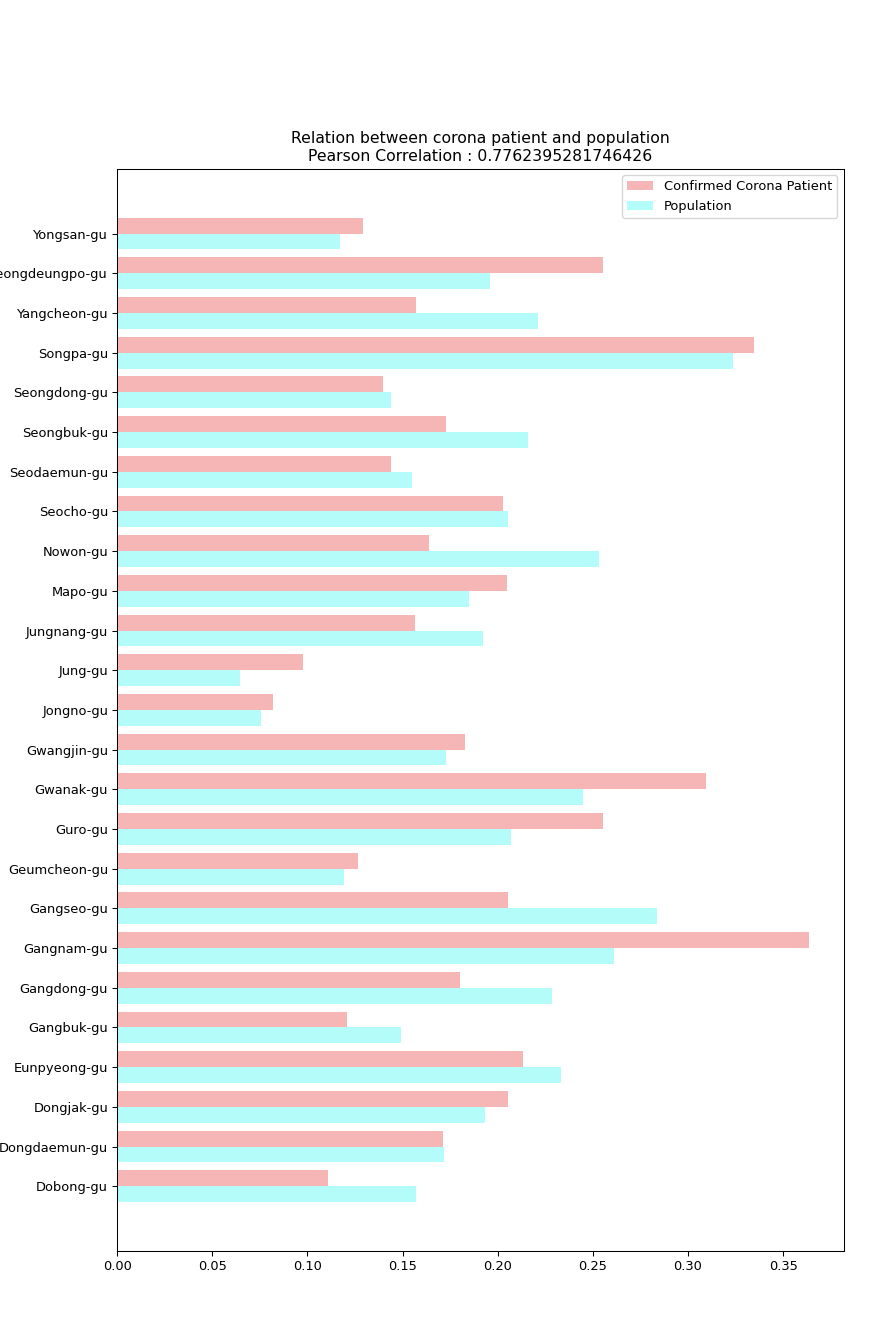

Text(0.5, 1.0, 'Relation between corona patient and population\nPearson Correlation : 0.7762395281746426')

In [52]:
plt.figure(figsize=(12,15))
bar1=plt.barh(np.arange(0,25),group_by_region['normed'],height=0.4, alpha=0.3, color='#E70E0E')
bar2=plt.barh(np.arange(0,25)-0.4,population['normed'],
         height=0.4, alpha=0.3, color='#08F8ED')
plt.legend(('Confirmed Corona Patient','Population'))
plt.yticks(ticks=np.arange(0,25)-0.2,labels=group_by_region.index)
plt.title("Relation between corona patient and population\nPearson Correlation : {}".format(stats.pearsonr(group_by_region['normed'],population['normed'])[0]))

In [61]:
plt.savefig('./result/patient_population_barh.png')

<IPython.core.display.Javascript object>


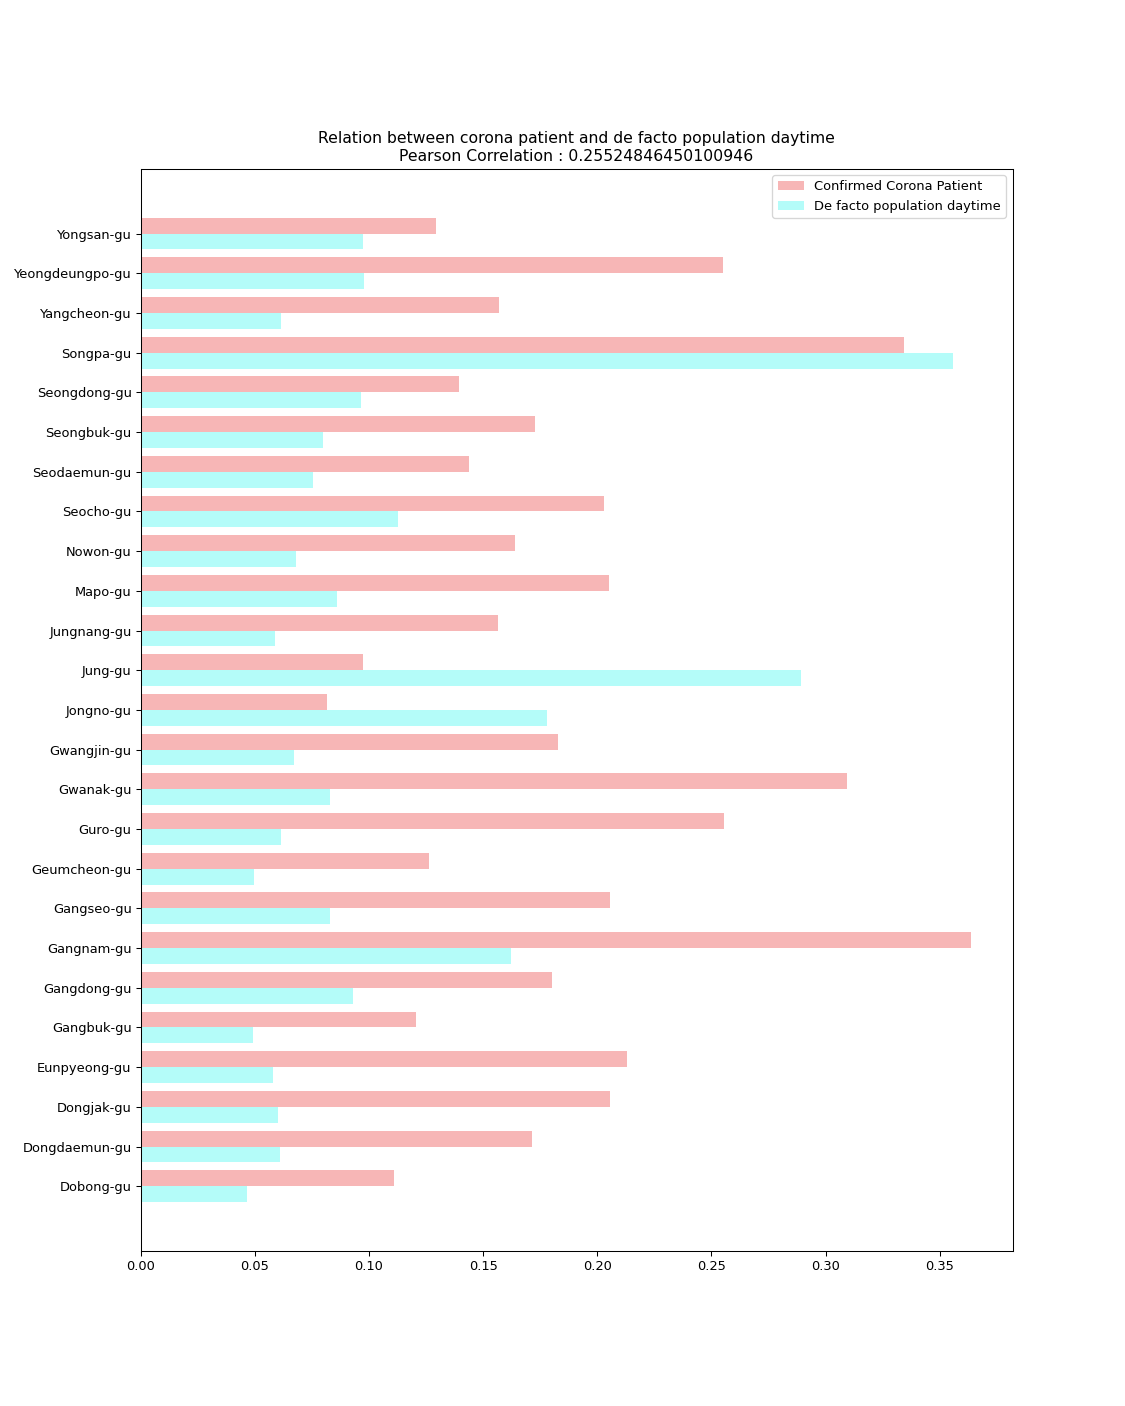

Text(0.5, 1.0, 'Relation between corona patient and de facto population daytime\nPearson Correlation : 0.25524846450100946')

In [54]:
plt.figure(figsize=(12,15))
bar1=plt.barh(np.arange(0,25),group_by_region['normed'],height=0.4, alpha=0.3, color='#E70E0E')
loc = local_name.loc[(local_name['hour']=='daytime'),'normed']
bar2=plt.barh(np.arange(0,25)-0.4,loc,
         height=0.4, alpha=0.3, color='#08F8ED')
plt.legend(('Confirmed Corona Patient','De facto population daytime'))
plt.yticks(ticks=np.arange(0,25)-0.2,labels=group_by_region.index)
plt.title("Relation between corona patient and de facto population daytime\nPearson Correlation : {}".format(stats.pearsonr(group_by_region['normed'],loc)[0]))

In [ ]:
plt.savefig('./result/patient_daytime_barh.png')

<IPython.core.display.Javascript object>


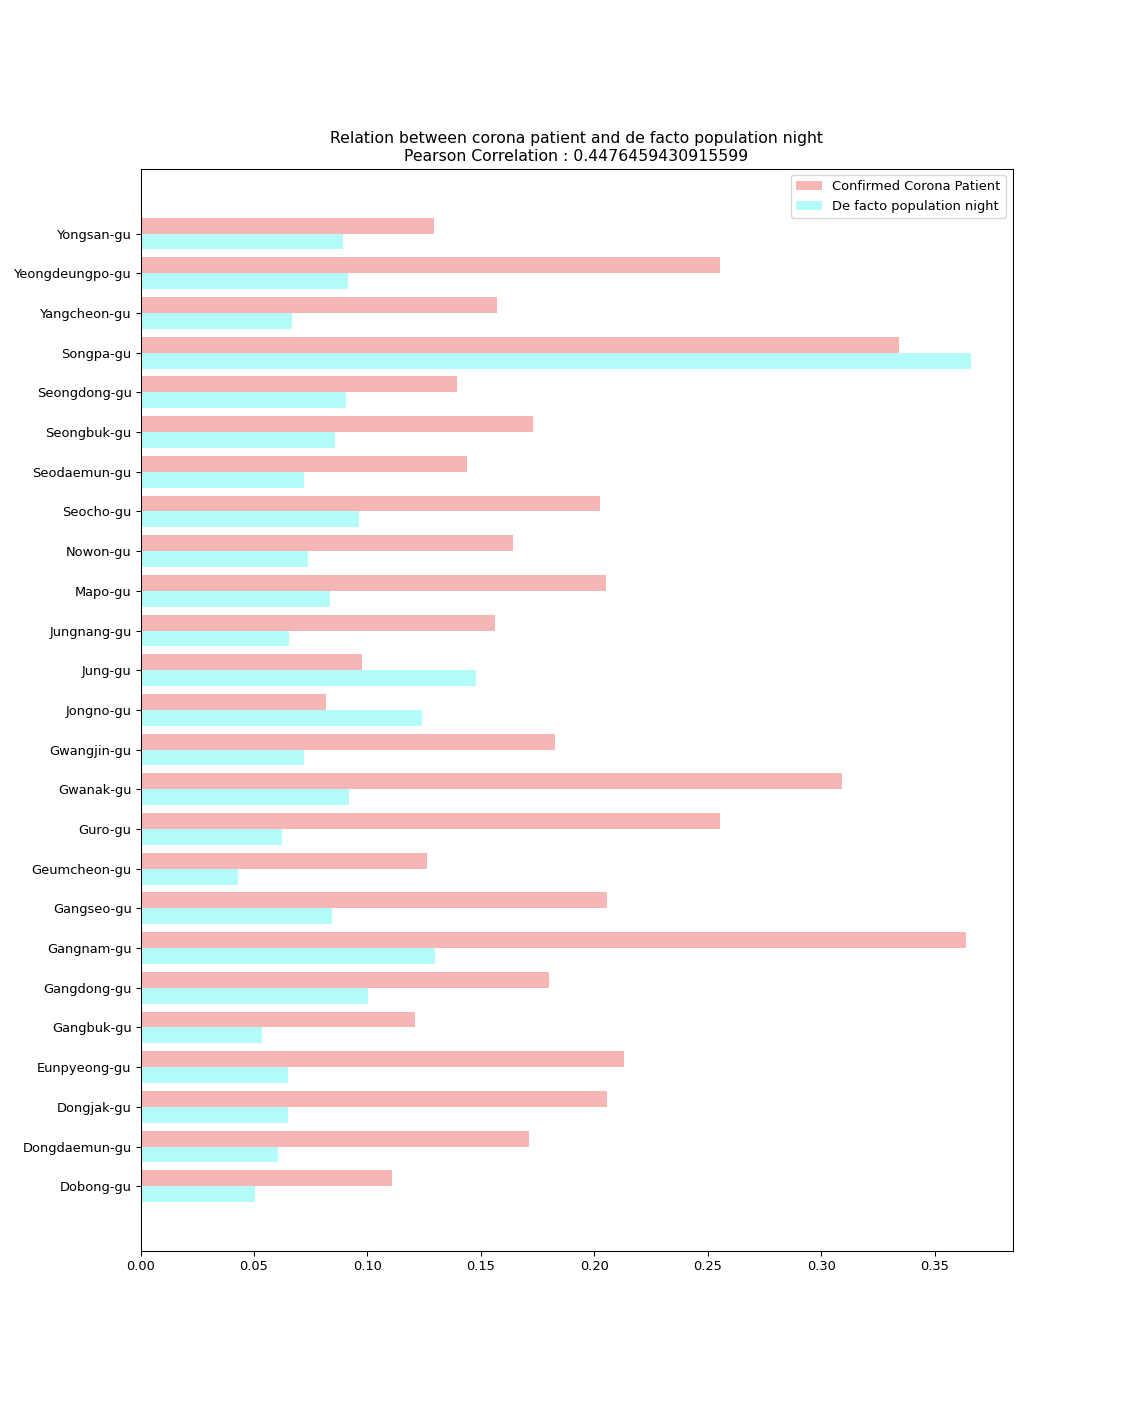

Text(0.5, 1.0, 'Relation between corona patient and de facto population night\nPearson Correlation : 0.4476459430915599')

In [58]:
plt.figure(figsize=(12,15))
bar1=plt.barh(np.arange(0,25),group_by_region['normed'],height=0.4, alpha=0.3, color='#E70E0E')
loc = local_name.loc[(local_name['hour']=='night'),'normed']
bar2=plt.barh(np.arange(0,25)-0.4,loc,
         height=0.4, alpha=0.3, color='#08F8ED')
plt.legend(('Confirmed Corona Patient','De facto population night'))
plt.yticks(ticks=np.arange(0,25)-0.2,labels=group_by_region.index)
plt.title("Relation between corona patient and de facto population night\nPearson Correlation : {}".format(stats.pearsonr(group_by_region['normed'],loc)[0]))

In [ ]:
plt.savefig('./result/patient_night_barh.png')

<IPython.core.display.Javascript object>


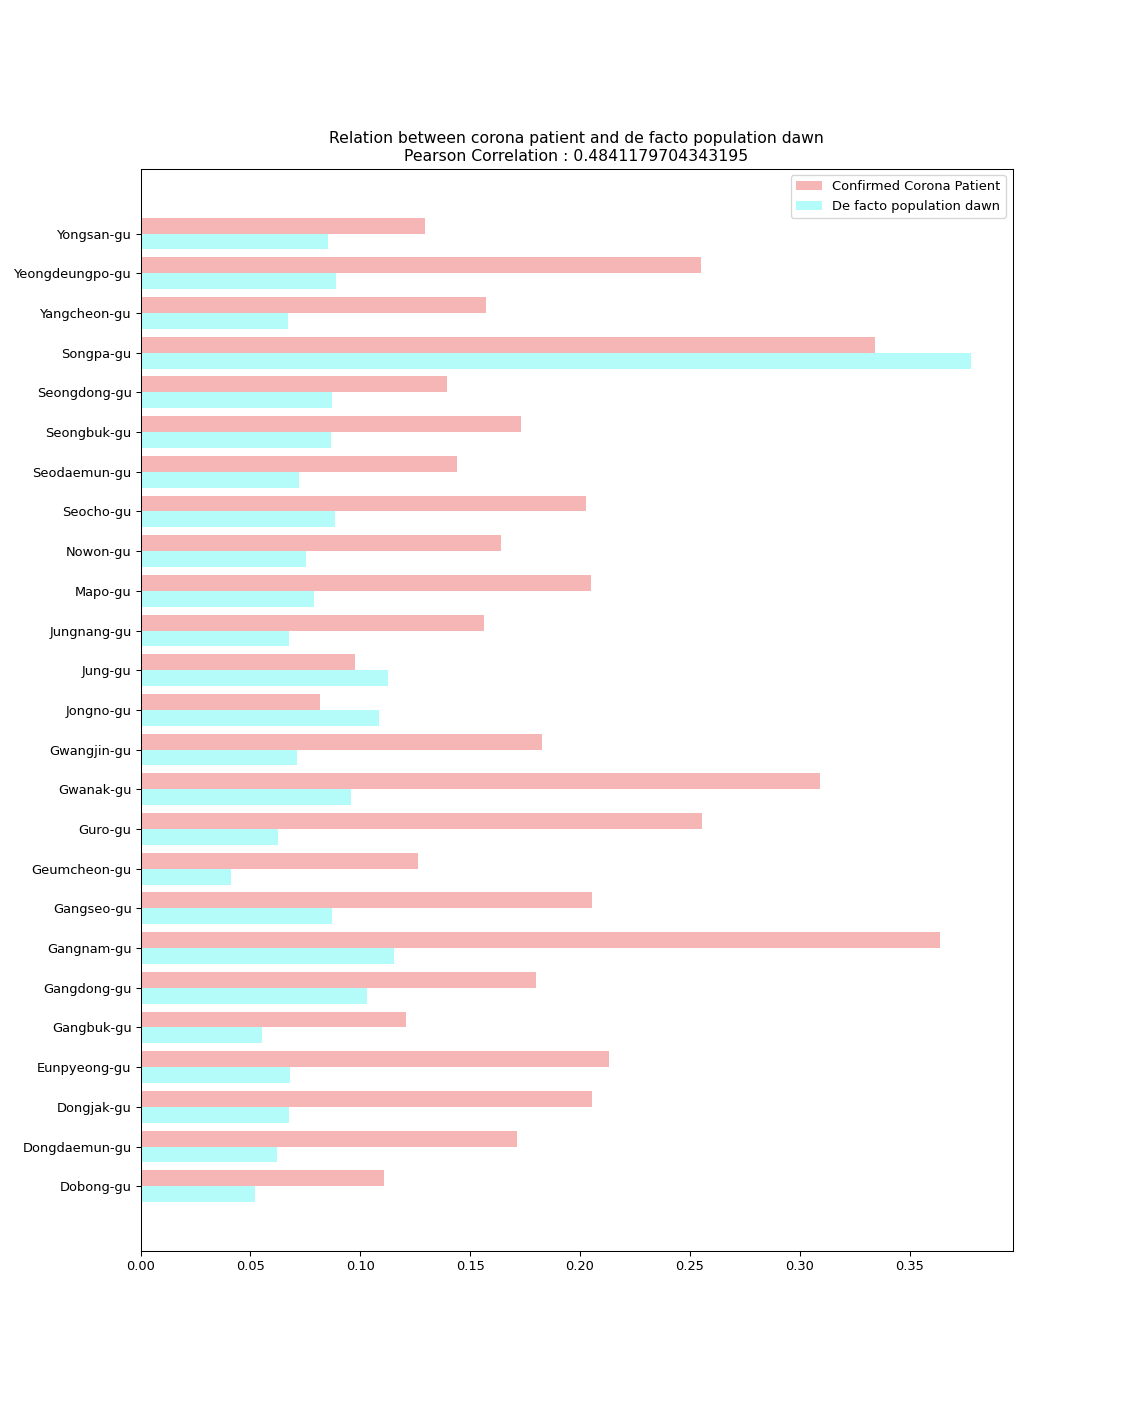

Text(0.5, 1.0, 'Relation between corona patient and de facto population dawn\nPearson Correlation : 0.4841179704343195')

In [60]:
plt.figure(figsize=(12,15))
bar1=plt.barh(np.arange(0,25),group_by_region['normed'],height=0.4, alpha=0.3, color='#E70E0E')
loc = local_name.loc[(local_name['hour']=='dawn'),'normed']
bar2=plt.barh(np.arange(0,25)-0.4,loc,
         height=0.4, alpha=0.3, color='#08F8ED')
plt.legend(('Confirmed Corona Patient','De facto population dawn'))
plt.yticks(ticks=np.arange(0,25)-0.2,labels=group_by_region.index)
plt.title("Relation between corona patient and de facto population dawn\nPearson Correlation : {}".format(stats.pearsonr(group_by_region['normed'],loc)[0]))

In [ ]:
plt.savefig('./result/patient_dawn_barh.png')

In [72]:
import scipy.stats as stats

print(stats.pearsonr(group_by_region['normed'],population['normed']))
print(stats.pearsonr(group_by_region['normed'],
               local_name.loc[(local_name['hour']=='daytime'),'normed']))
print(stats.pearsonr(group_by_region['normed'],
               local_name.loc[(local_name['hour']=='night'),'normed']))
print(stats.pearsonr(group_by_region['normed'],
               local_name.loc[(local_name['hour']=='dawn'),'normed']))

(0.7762395281746426, 5.096842354731773e-06)
(0.25524846450100946, 0.21816321573917277)
(0.4476459430915599, 0.024841023457345686)
(0.4841179704343195, 0.014199100432455522)


[Seoul Map Source](https://commons.wikimedia.org/wiki/File:Seoul_districts.svg)

In [114]:
#patient
#group_by_region
#admin_code
population
#local
#local_name

,gu,household,sum,man,woman,local_sum,local_man,local_woman,foreign_sum,foreign_man,foreign_woman,people_per_household,aged_65,normed
9,Dobong-gu,138387,322419,156843,165576,320365,156080,164285,2054,763,1291,2.31,62894,0.156978
5,Dongdaemun-gu,166372,352259,172865,179394,338040,167335,170705,14219,5530,8689,2.03,61262,0.171507
19,Dongjak-gu,183859,397231,191657,205574,387847,187617,200230,9384,4040,5344,2.11,65732,0.193403
11,Eunpyeong-gu,213662,479409,229241,250168,475371,227584,247787,4038,1657,2381,2.22,85921,0.233413
8,Gangbuk-gu,144525,306093,148824,157269,302645,147542,155103,3448,1282,2166,2.09,63383,0.149030
24,Gangdong-gu,200170,469094,230388,238706,465209,228652,236557,3885,1736,2149,2.32,72275,0.228391
22,Gangnam-gu,232707,536107,256449,279658,531375,254139,277236,4732,2310,2422,2.28,76184,0.261018
15,Gangseo-gu,269276,582995,280822,302173,577519,278360,299159,5476,2462,3014,2.14,90404,0.283847
17,Geumcheon-gu,115358,244685,124394,120291,230168,116491,113677,14517,7903,6614,2.00,40181,0.119132
16,Guro-gu,180258,424582,210936,213646,399266,197034,202232,25316,13902,11414,2.21,71186,0.206719


In [100]:
from bs4 import BeautifulSoup as bs
import matplotlib as mlp

In [141]:
population.head()

,gu,household,sum,man,woman,local_sum,local_man,local_woman,foreign_sum,foreign_man,foreign_woman,people_per_household,aged_65,normed
9,Dobong-gu,138387,322419,156843,165576,320365,156080,164285,2054,763,1291,2.31,62894,0.156978
5,Dongdaemun-gu,166372,352259,172865,179394,338040,167335,170705,14219,5530,8689,2.03,61262,0.171507
19,Dongjak-gu,183859,397231,191657,205574,387847,187617,200230,9384,4040,5344,2.11,65732,0.193403
11,Eunpyeong-gu,213662,479409,229241,250168,475371,227584,247787,4038,1657,2381,2.22,85921,0.233413
8,Gangbuk-gu,144525,306093,148824,157269,302645,147542,155103,3448,1282,2166,2.09,63383,0.149030


In [146]:
#Population
cmap = mlp.cm.get_cmap('cool')
def getHex(tup):
    result = '#'
    for idx,item in enumerate(tup):
        if idx == 3:
            break
        result += hex(item)[2:]
    return result

svg_population = open('Seoul_districts.svg','r').read()
soup = bs(svg_population)
paths = soup.findAll('path')

val_dict = dict(zip(population['gu'],population['normed']))
val_dict['Yeongdeungpo-gu_1_'] = val_dict['Yeongdeungpo-gu']

for path in paths:
    rgba = cmap(val_dict[path['id']],bytes=True)
    path['fill'] = getHex(rgba)

fd = open('./result/seoulMap_population.svg','w')
fd.write(soup.prettify())
fd.close()

In [142]:
group_by_region.head()

,serial_number,confirmed_date,patient_number,nation,patient_info,travel_history,contact_history,state,moving_route,reg_date,update_date,is_expose,노출여부,normed
region,,,,,,,,,,,,,,
Dobong-gu,1147,1147,0,0,0,11,1147,0,1147,0,1147,1147,1147,0.110933
Dongdaemun-gu,1770,1770,0,0,0,14,1770,0,1770,0,1770,1770,1770,0.171186
Dongjak-gu,2124,2124,0,0,0,21,2124,0,2124,0,2124,2124,2124,0.205424
Eunpyeong-gu,2203,2203,0,0,0,15,2203,0,2203,0,2203,2203,2203,0.213064
Gangbuk-gu,1249,1249,0,0,0,2,1249,0,1249,0,1249,1249,1249,0.120798


In [143]:
#Corona patient
cmap = mlp.cm.get_cmap('Spectral')
def getHex(tup):
    result = '#'
    for idx,item in enumerate(tup):
        if idx == 3:
            break
        result += hex(item)[2:]
    return result

svg_population = open('Seoul_districts.svg','r').read()
soup = bs(svg_population)
paths = soup.findAll('path')

val_dict = dict(zip(group_by_region.index,group_by_region['normed']))
val_dict['Yeongdeungpo-gu_1_'] = val_dict['Yeongdeungpo-gu']

for path in paths:
    rgba = cmap(val_dict[path['id']],bytes=True)
    path['fill'] = getHex(rgba)

fd = open('./result/seoulMap_corona.svg','w')
fd.write(soup.prettify())
fd.close()

In [147]:
local_name.head()

,administration_code,hour,population20210701,population20210702,population20210703,population20210704,population20210705,population20210706,population20210707,population20210708,...,population20210923,population20210924,population20210925,population20210926,population20210927,population20210928,population20210929,population20210930,mean2021,normed
0,Dobong-gu,dawn,5837.503236,5840.551017,5856.466192,5876.077357,5871.969153,5846.721761,5878.785560,6050.029086,...,5972.508602,5966.279723,6312.110826,6369.487283,6333.749041,6329.881767,6183.436765,6110.496609,6089.086758,0.052009
1,Dobong-gu,daytime,5005.348903,4998.236288,5486.741717,5714.378895,5019.618238,4982.035943,5046.988689,5142.839331,...,5211.751958,5221.668605,5771.044033,5948.834518,5364.773673,5162.639998,5257.326405,5136.520173,5430.286447,0.046382
2,Dobong-gu,night,5588.508647,5521.981652,5774.963439,5861.509266,5656.447850,5610.828513,5639.732670,5695.838812,...,5776.337715,5895.840333,6095.636847,6088.953152,6033.187688,5820.443822,5844.799855,5750.408815,5914.188404,0.050515
3,Dongdaemun-gu,dawn,7213.201012,7172.009135,7106.533280,7041.237747,7171.887386,7194.784898,7197.243252,7130.099215,...,7077.636485,7169.317492,7417.125131,7364.806049,7543.551058,7593.667080,7438.221947,7428.672615,7276.355989,0.062150
4,Dongdaemun-gu,daytime,7050.724062,6993.158354,6909.350496,6913.127733,7072.842292,7052.079402,7043.568827,7072.461243,...,7046.598442,7111.913040,7099.847094,7049.736892,7437.389561,7298.615653,7349.854025,7285.828001,7138.247030,0.060970


In [150]:
#de facto population daytime
cmap = mlp.cm.get_cmap('Spectral')
def getHex(tup):
    result = '#'
    for idx,item in enumerate(tup):
        if idx == 3:
            break
        result += hex(item)[2:]
    return result

svg_population = open('Seoul_districts.svg','r').read()
soup = bs(svg_population)
paths = soup.findAll('path')

loc = local_name.loc[(local_name['hour']=='daytime')]
val_dict = dict(zip(loc['administration_code'],loc['normed']))
val_dict['Yeongdeungpo-gu_1_'] = val_dict['Yeongdeungpo-gu']

for path in paths:
    rgba = cmap(val_dict[path['id']],bytes=True)
    path['fill'] = getHex(rgba)

fd = open('./result/population_daytime.svg','w')
fd.write(soup.prettify())
fd.close()

In [151]:
#de facto population night
cmap = mlp.cm.get_cmap('Spectral')
def getHex(tup):
    result = '#'
    for idx,item in enumerate(tup):
        if idx == 3:
            break
        result += hex(item)[2:]
    return result

svg_population = open('Seoul_districts.svg','r').read()
soup = bs(svg_population)
paths = soup.findAll('path')

loc = local_name.loc[(local_name['hour']=='night')]
val_dict = dict(zip(loc['administration_code'],loc['normed']))
val_dict['Yeongdeungpo-gu_1_'] = val_dict['Yeongdeungpo-gu']

for path in paths:
    rgba = cmap(val_dict[path['id']],bytes=True)
    path['fill'] = getHex(rgba)

fd = open('./result/population_night.svg','w')
fd.write(soup.prettify())
fd.close()

In [152]:
#de facto population dawn
cmap = mlp.cm.get_cmap('Spectral')
def getHex(tup):
    result = '#'
    for idx,item in enumerate(tup):
        if idx == 3:
            break
        result += hex(item)[2:]
    return result

svg_population = open('Seoul_districts.svg','r').read()
soup = bs(svg_population)
paths = soup.findAll('path')

loc = local_name.loc[(local_name['hour']=='dawn')]
val_dict = dict(zip(loc['administration_code'],loc['normed']))
val_dict['Yeongdeungpo-gu_1_'] = val_dict['Yeongdeungpo-gu']

for path in paths:
    rgba = cmap(val_dict[path['id']],bytes=True)
    path['fill'] = getHex(rgba)

fd = open('./result/population_dawn.svg','w')
fd.write(soup.prettify())
fd.close()